### EDA for Wine Quality Red

The Wine Quality Red dataset is a well-known dataset from the UCI Machine Learning Repository, primarily used for regression and classification tasks in machine learning. It contains information about the chemical properties of red wine and their associated quality ratings. The dataset can be used for building predictive models to assess wine quality based on these chemical features.

#### Dataset Overview:


1. Source: The data is derived from the "Wine Quality" dataset, which includes both red and white wine datasets. The red wine subset is typically used for experimentation in machine learning tasks.
2. Features: The dataset contains various chemical attributes of red wine that are believed to influence the quality of the wine.

#### Features (Columns):
The dataset has 12 input features (predictors) and 1 output feature (target).

1. Fixed Acidity: The amount of fixed acids in the wine, typically tartaric acid, expressed in grams per liter (g/L).
2. Volatile Acidity: The amount of volatile acids (such as acetic acid) in the wine, expressed in g/L.
3. Citric Acid: The amount of citric acid in the wine, expressed in g/L.
4. Residual Sugar: The amount of sugar remaining after fermentation, expressed in g/L.
5. Chlorides: The amount of chlorides (salt) in the wine, expressed in g/L.
6. Free Sulfur Dioxide: The amount of free sulfur dioxide in the wine, expressed in milligrams per liter (mg/L).
7. Total Sulfur Dioxide: The total amount of sulfur dioxide in the wine, expressed in mg/L.
8. Density: The density of the wine, which is affected by alcohol content and sugar levels, expressed in g/cm³.
9. pH: The pH level of the wine, which is a measure of its acidity.
10. Sulphates: The amount of sulphates in the wine, expressed in g/L.
11. Alcohol: The alcohol content of the wine, expressed as a percentage by volume (%).


12. Quality (Target variable): The quality of the wine, rated on a scale from 0 to 10, where 0 is the worst and 10 is the best.

In [1]:
## Importing Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
### Now Loading the Dataset

df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
### Now analyzing the data type and its shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

In [5]:
## Describing the data

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
## checking the columns 

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
## Checking the unique values in the target column 'quality' :

df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
### Now checking for Missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Observation 

we have checked for missing values in the dataset and found no missing values.

In [9]:
### Cheking for duplicate data 


df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### Observation 

I have found 240 rows out of 1599 are duplicate. so, I am going to drop all these rows because these data are not so important because they are alreay present in the dataset.

In [10]:
### Droping the duplicate records

df.drop_duplicates(inplace=True)  ## inplace True, so the change become  permanent

In [11]:
df.shape

(1359, 12)

#### Exploratory Data Analysis

EDA is a vital step in the data analysis process that entails visually and statistically analyzing datasets to find patterns, trends, and insights.

The principal goals of exploratory data analysis (EDA) are to detect anomalies in the dataset and develop recommendations for additional investigation, thereby guaranteeing a thorough comprehension of the subtleties of the data.

#### Univariate Analysis

In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important.

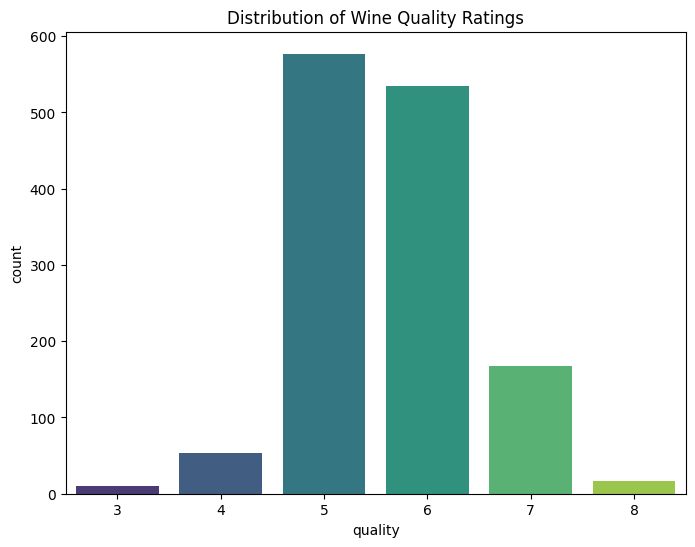

In [12]:
# Plot distribution of the quality scores


plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

### Observation


Here I can see that the data has more wines rated around 5 and 6, with fewer wines rated at the extremes (0, 10). 

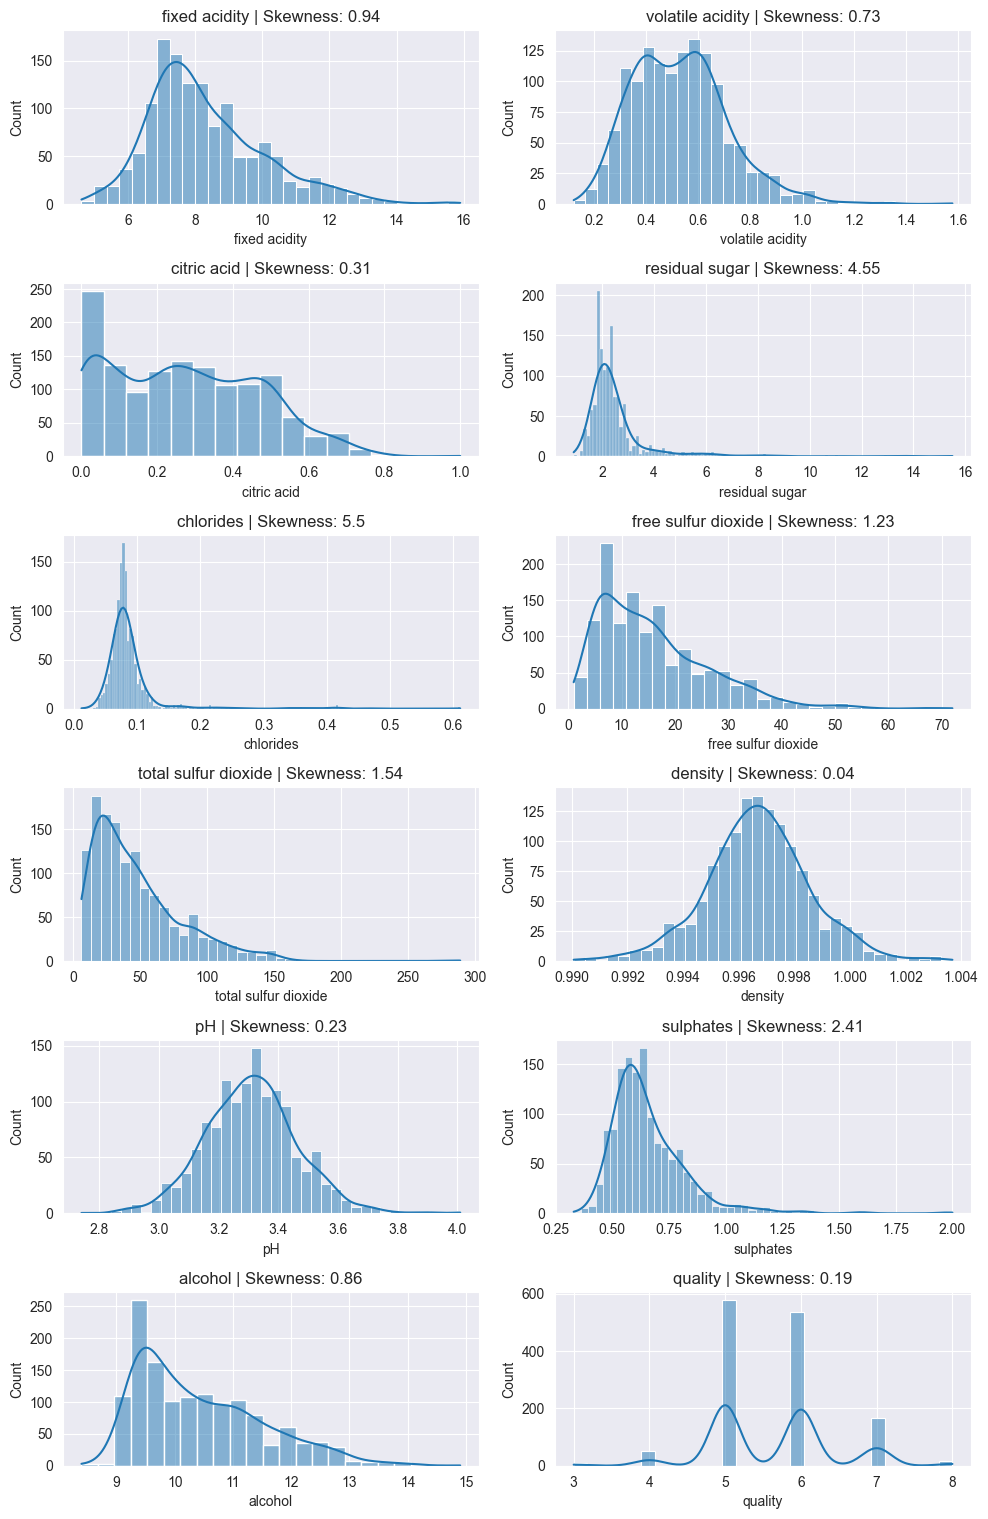

In [13]:
### Kernal Density Plots


sns.set_style('darkgrid')

# Identify numerical columns

numerical_columns=df.select_dtypes(include=['int64','float64']).columns

# Plot distribution of each numerical feature

plt.figure(figsize=(10, 30))
for idx, feature in enumerate(numerical_columns,1):
    #print(idx,feature)
    plt.subplot(len(numerical_columns),2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(),2)}")

# Adjust layout and show plots

plt.tight_layout()
plt.show()

1. Fixed Acidity:

- Slightly right-skewed distribution.
- Most wines have a fixed acidity between 6 and 10.

2. Volatile Acidity:

- Skewed distribution with a long tail toward higher values.
- A lower volatile acidity is generally preferred for higher quality wine.

3. Citric Acid:

- Peaks near zero, indicating many wines have very low citric acid content.

4. Residual Sugar:

- Heavily right-skewed with a majority of wines having residual sugar <3.

5. Chlorides:

- Strong right skew. A few wines have significantly higher chloride content, possibly indicating outliers.

6. Free Sulfur Dioxide and Total Sulfur Dioxide:

- Distributions are right-skewed, with the majority of values clustering at lower ranges.

7. Density:

- Close to a normal distribution centered around ~0.997.

8. pH:

- Near-normal distribution with most wines having a pH between 3.2 and 3.4.

9. Sulphates:

- Slightly skewed with a peak around 0.6.

10. Alcohol:

- Right-skewed, with the majority of wines having alcohol content between 9% and 12%.

11. Quality:

- The target variable is ordinal, with most wines rated between 5 and 6.

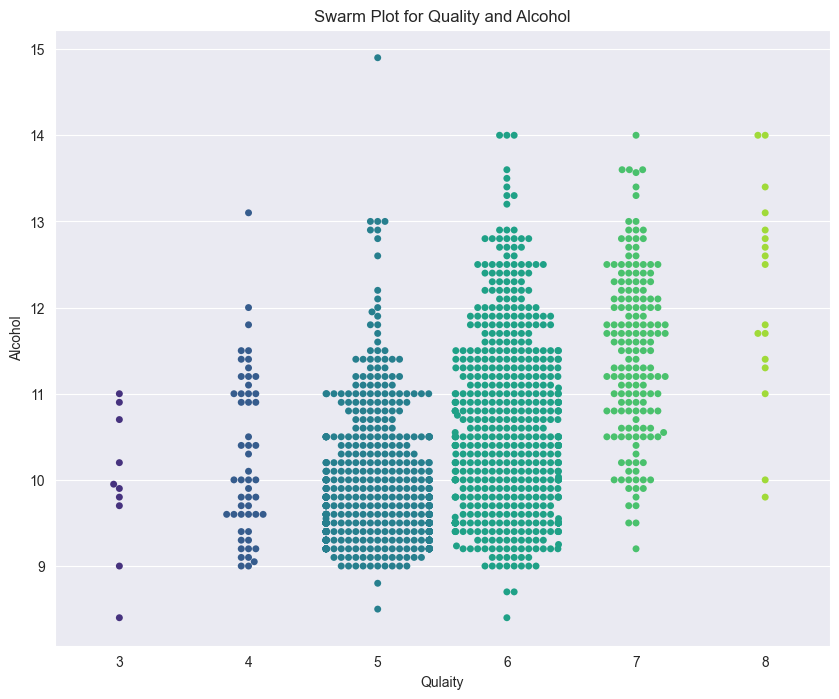

In [14]:
### Swarn Plot

plt.figure(figsize=(10,8))

sns.swarmplot(x='quality', y='alcohol', data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Qulaity')
plt.ylabel('Alcohol')
plt.show()

### Observation

1. Higher wine quality levels are associated with greater alcohol content, particularly for wines rated 7 and above.
2. Lower-quality wines (ratings of 3 and 4) tend to have lower alcohol levels.
3. Overlap among data points is still present, suggesting dense clusters for mid-range qualities (e.g., 5 and 6).

### Bivariate Analysis


When doing a bivariate analysis, two variables are examined simultaneously in order to look for patterns, dependencies, or interactions between them. Understanding how changes in one variable may correspond to changes in another requires the use of this statistical method.

<Figure size 1000x600 with 0 Axes>

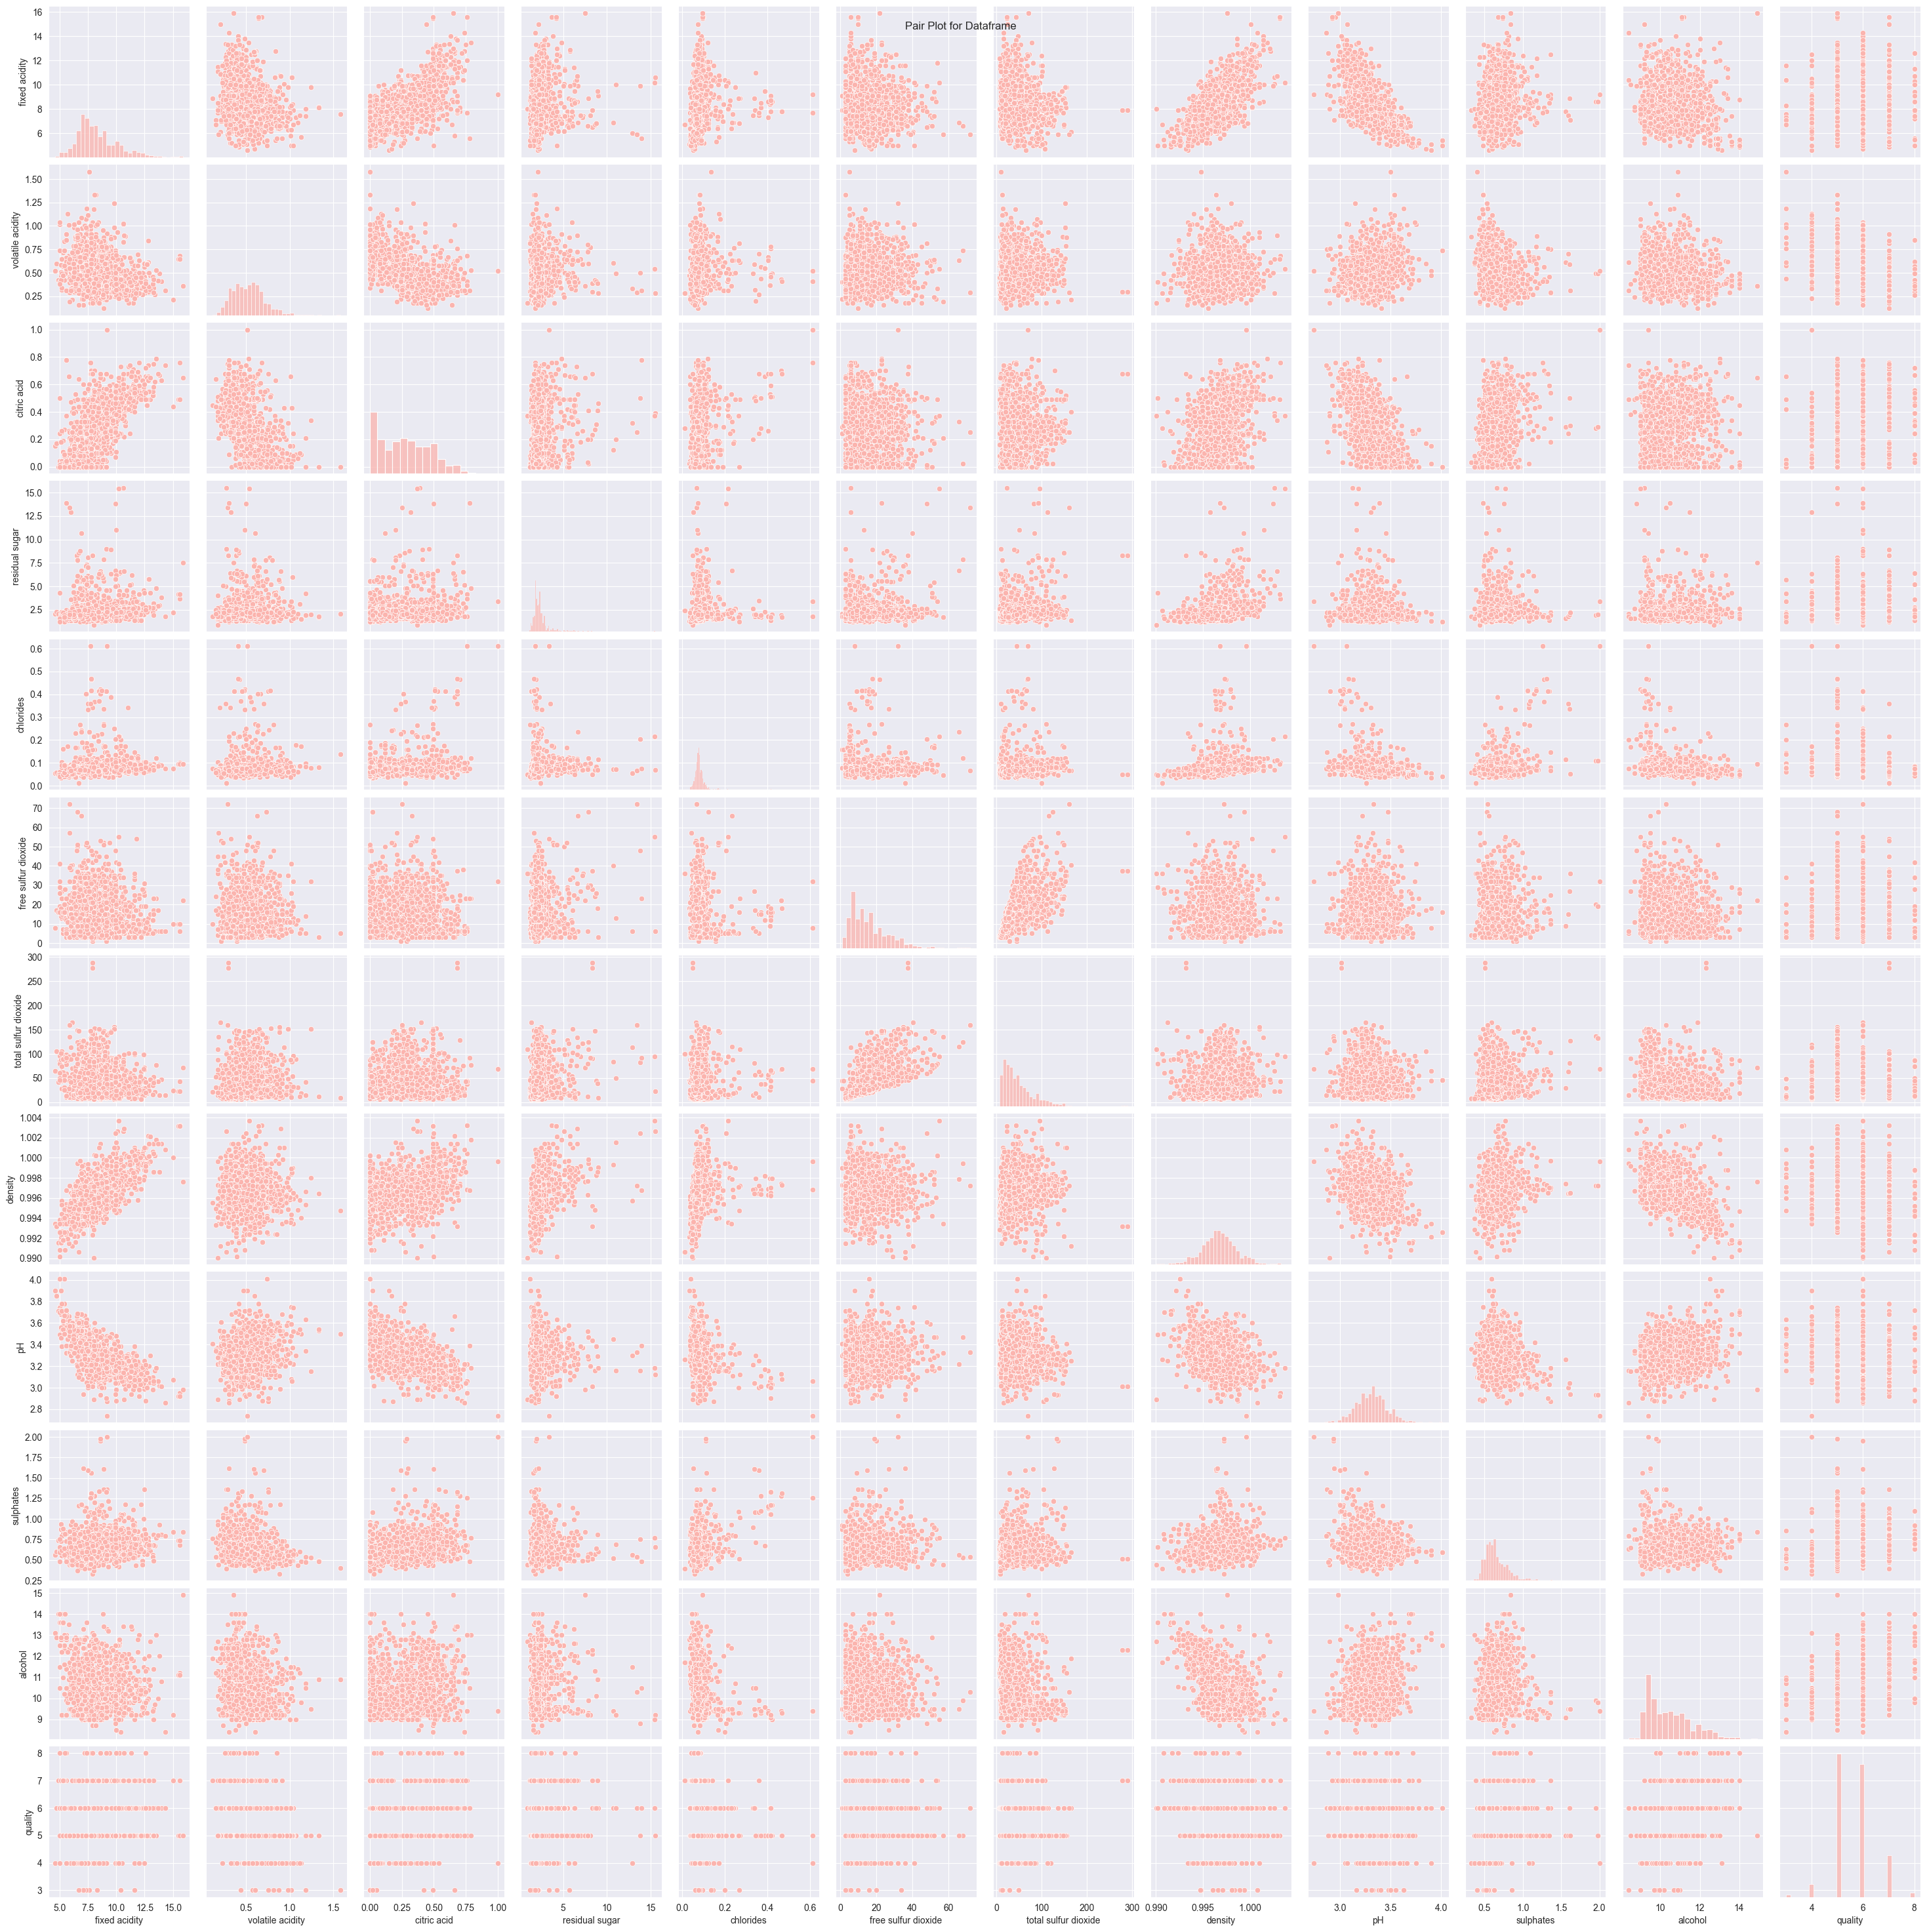

In [15]:
### Pair plot

sns.set_palette('Pastel1')

plt.figure(figsize=(10,6))

sns.pairplot(df)

plt.suptitle('Pair Plot for Dataframe')
plt.show()

In [16]:
df1=df
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


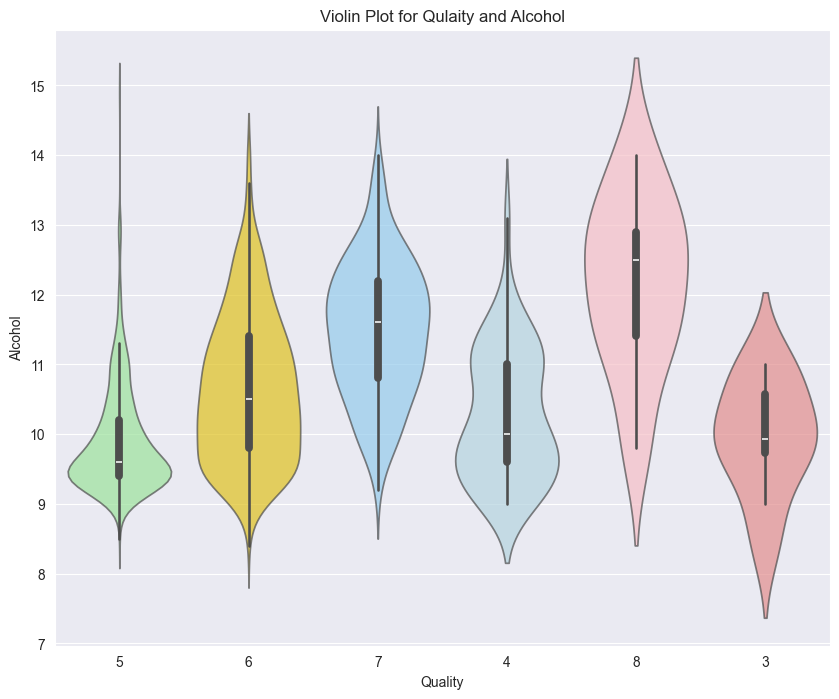

In [17]:
### Violin Plot

df1['quality'] = df1['quality'].astype(str)  ## convert 'quality' to categorical

plt.figure(figsize=(10,8))

sns.violinplot(x='quality', y='alcohol', data=df,palette={
               '3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', 
               '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7 )

plt.title('Violin Plot for Qulaity and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

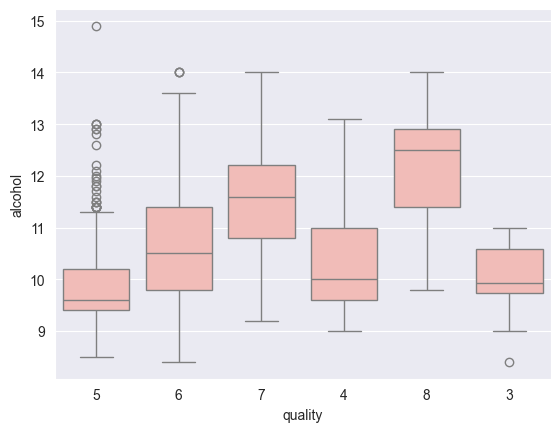

In [23]:
### Box Plot for outliers

sns.boxplot(x='quality', y='alcohol', data=df)




## Correlation Analysis

Understanding how the features are correlated with each other and with the target variable (Quality) is crucial.

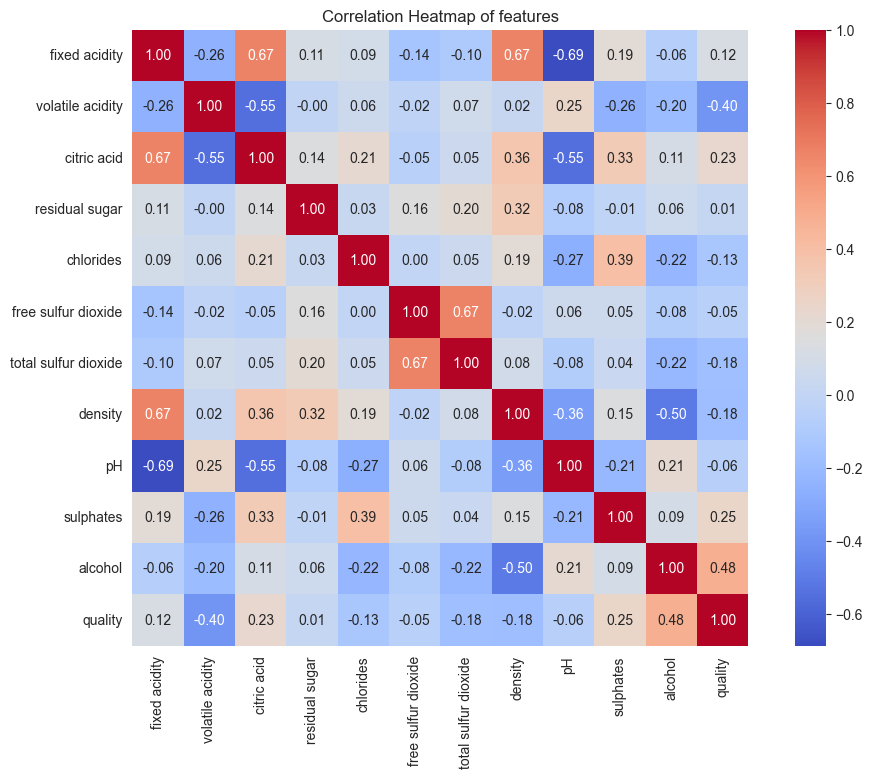

In [19]:
### Correlation matrix

corr_matrix=df.corr()

# Heatmap of correlations


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm', cbar=True,square=True)
plt.title('Correlation Heatmap of features')
plt.show()

### Observation

- The range of a correlation coefficient is between -1 and +1

Through this we can understand:

1. Strong Positive Correlations:

- Alcohol and Quality (
𝑟
≈
0.48
r≈0.48): Higher alcohol content tends to be associated with better wine quality.

- Sulphates and Quality (
𝑟
≈
0.25
r≈0.25): Indicates a moderate positive correlation.


2. Strong Negative Correlations:

- Volatile Acidity and Quality (
𝑟
≈
−
0.39
r≈−0.39): High levels of volatile acidity are associated with lower wine quality.

- Density and Alcohol (
𝑟
≈
−
0.69
r≈−0.69): As alcohol increases, density decreases, likely due to the lower density of ethanol compared to water.


3. Other Insights:

- Free Sulfur Dioxide and Total Sulfur Dioxide (
𝑟
≈
0.67
r≈0.67): Strongly correlated as expected.

- Features like "citric acid," "residual sugar," and "chlorides" show weak or negligible correlations with quality.